## Imports

In [1]:
import pandas as pd
from sklearn import decomposition

## Read in data

In [4]:
df = pd.read_csv('matrix.csv')
df.head(5)

,Unnamed: 0,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR


In [5]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df.head(5)

,Sample,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR


## Drop null columns

In [7]:
# Get rid of the non snp columns when doing pca
non_snp_columns = ['Population code', 'Sample']

df_snps = df.drop(non_snp_columns, axis=1)
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 4943)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

## Perform PCA

In [8]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [9]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08253525 0.05412034]
[188.93732058 152.99536559]


In [10]:
to_plot = pca.transform(matrix)
to_plot.shape

(1092, 2)

In [11]:
import matplotlib.pyplot as plt

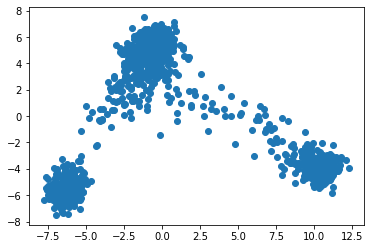

In [12]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])

## Use altair for a prettier plot

In [13]:
import altair as alt

In [14]:
df_plot = df[non_snp_columns].copy()
df_plot.head(5)

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101


In [15]:
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot.head(5)

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076


In [16]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

## Merge the tsv file for more geography details

In [17]:
pop = pd.read_csv('igsr_populations.tsv', sep='\t')
pop.head(5)

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,FIN,FIN,Finnish,Finnish in Finland,60.17000,24.930000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,BEB,BEB,Bengali,Bengali in Bangladesh,23.70000,90.350000,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.40000,-66.100000,AMR,American Ancestry,#710027,2,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [18]:
df_plot = df_plot.merge(pop, on='Population code', how='inner')
df_plot.head(5)

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Plot the PCA:

In [19]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)